In [188]:
import pandas as pd
import s3fs
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [189]:
#here the i is for the period we want 
#note that we only have period 1 to 4 in our bucket because that is all we generated with our python script 
i = 1
input_file = f"s3://mlops-project-dataset-deen/paris-housing-dataset/ParisHousing_period_{i:02d}.parquet"


In [190]:
df = pd.read_parquet(input_file)

In [191]:
#we check the first few rows of the model 
df.head()

index  squareMeters  numberOfRooms  hasYard  hasPool  floors  cityCode  \
0   6681         58413             43        1        1      27     19305   
1   7424         75898             97        0        1       6     33301   
2   9374         67417             68        0        0      67      3056   
3   4427         99291             89        0        0      40     38298   
4   5267         63720             18        0        1      59     12560   

   cityPartRange  numPrevOwners  made  isNewBuilt  hasStormProtector  \
0              3             10  1990           1                  1   
1              2             10  1990           1                  1   
2              9              2  1990           1                  0   
3              3             10  1990           1                  1   
4              9              1  1990           0                  1   

   basement  attic  garage  hasStorageRoom  hasGuestRoom      price category  
0      6367   6234     601               1             3  5852813.0   Luxury  
1      6591   6169     411               0             8  7592058.0    Basic  
2      1335   2071     815               1             8  6743688.0    Basic  
3      4592   8562     369               1             1  9933729.0    Basic  
4       279   5973     542               1             2  6380496.0    Basic

### Here we do some exploratory data analysis 

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              2500 non-null   int64  
 1   squareMeters       2500 non-null   int64  
 2   numberOfRooms      2500 non-null   int64  
 3   hasYard            2500 non-null   int64  
 4   hasPool            2500 non-null   int64  
 5   floors             2500 non-null   int64  
 6   cityCode           2500 non-null   int64  
 7   cityPartRange      2500 non-null   int64  
 8   numPrevOwners      2500 non-null   int64  
 9   made               2500 non-null   int64  
 10  isNewBuilt         2500 non-null   int64  
 11  hasStormProtector  2500 non-null   int64  
 12  basement           2500 non-null   int64  
 13  attic              2500 non-null   int64  
 14  garage             2500 non-null   int64  
 15  hasStorageRoom     2500 non-null   int64  
 16  hasGuestRoom       2500 

In [15]:
#we check the sim of the missing values 
#we have no missing values 
df.isnull().sum()

index                0
squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
category             0
dtype: int64

In [16]:
#we do some descriptive statistics
#
df.describe()

index  squareMeters  numberOfRooms      hasYard      hasPool  \
count  2500.000000   2500.000000    2500.000000  2500.000000  2500.000000   
mean   4996.421600  50076.237600      49.636400     0.509600     0.493200   
std    2857.919813  28994.977744      28.695393     0.500008     0.500054   
min       0.000000    111.000000       1.000000     0.000000     0.000000   
25%    2518.750000  24740.750000      25.000000     0.000000     0.000000   
50%    5021.000000  50301.000000      49.000000     1.000000     0.000000   
75%    7408.750000  75131.250000      74.000000     1.000000     1.000000   
max    9997.000000  99985.000000     100.000000     1.000000     1.000000   

            floors      cityCode  cityPartRange  numPrevOwners         made  \
count  2500.000000   2500.000000    2500.000000    2500.000000  2500.000000   
mean     50.000800  50535.241200       5.506400       5.506400  2001.430400   
std      28.820678  28928.339032       2.868249       2.872988     2.330693   
min       1.000000      3.000000       1.000000       1.000000  1997.000000   
25%      25.000000  24919.750000       3.000000       3.000000  1999.000000   
50%      51.000000  50687.500000       6.000000       5.000000  2001.000000   
75%      75.000000  76277.250000       8.000000       8.000000  2003.000000   
max     100.000000  99953.000000      10.000000      10.000000  2005.000000   

        isNewBuilt  hasStormProtector     basement        attic       garage  \
count  2500.000000        2500.000000  2500.000000  2500.000000  2500.000000   
mean      0.495200           0.495200  5014.677200  5027.427200   552.134800   
std       0.500077           0.500077  2875.825974  2900.768584   260.808453   
min       0.000000           0.000000    10.000000     7.000000   100.000000   
25%       0.000000           0.000000  2482.750000  2568.250000   328.000000   
50%       0.000000           0.000000  5075.500000  4997.000000   544.500000   
75%       1.000000           1.000000  7484.750000  7533.250000   778.250000   
max       1.000000           1.000000  9989.000000  9986.000000  1000.000000   

       hasStorageRoom  hasGuestRoom         price  
count     2500.000000   2500.000000  2.500000e+03  
mean         0.497200      5.006000  5.014009e+06  
std          0.500092      3.195442  2.899407e+06  
min          0.000000      0.000000  1.443130e+04  
25%          0.000000      2.000000  2.478114e+06  
50%          0.000000      5.000000  5.038938e+06  
75%          1.000000      8.000000  7.517925e+06  
max          1.000000     10.000000  1.000428e+07

In [44]:
#checks the 95 98 99 percentiles
df.price.describe(percentiles=[0.95, 0.98, 0.99])

count    2.500000e+03
mean     4.978221e+06
std      2.867469e+06
min      1.031350e+04
50%      4.938377e+06
95%      9.488480e+06
98%      9.817505e+06
99%      9.907187e+06
max      1.000294e+07
Name: price, dtype: float64

/home/deen/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

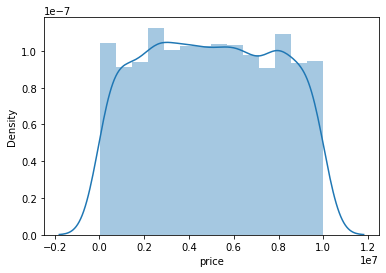

In [193]:
#we check the distribution of the prices 
sns.distplot(df.price)

In [198]:
#seems there are no outliers
sns.boxplot(y=df.price)

<AxesSubplot:ylabel='price'>

In [199]:
df_rooms = df.groupby('numberOfRooms').category.value_counts()

In [200]:
#here we look at the difference between the basic and luxury appartments when it comes to qty of rooms
with pd.option_context("display.max_rows", None):
    display(df_rooms)

numberOfRooms  category
1              2           21
               1            1
2              2           19
               1            2
3              2           28
               1            6
4              2           26
               1            3
5              2           19
               1            4
6              2           17
               1            3
7              2           19
               1            4
8              2           25
               1            4
9              2           16
               1            3
10             2           26
               1            2
11             2           21
               1            3
12             2           17
               1            4
13             2           19
               1            3
14             2           22
               1            4
15             2           18
               1            8
16             2           19
               1            3
17             2

In [201]:
#here we drop the category column
df['category'] = pd.factorize(df['category'])[0] + 1
dataset = df

In [202]:
#we create a heatmap to see which categories influence the price of house
corr = dataset.corr()
#we choose the size of the figure 
fig, ax = plt.subplots(figsize=(15, 5))
#choosing the color of the heatmap with annotation
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")


<AxesSubplot:>

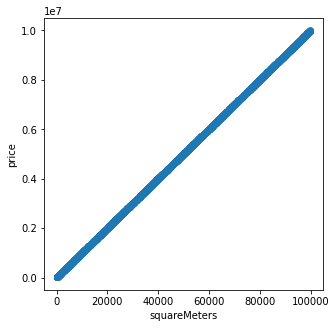

In [203]:
#we plot the squaremeters and the price 
fig, ax1 = plt.subplots(figsize=(5, 5))
sns.regplot(x="squareMeters", y="price", data=df);

### from the correlation heatmap we can see that the square meter has a very strong correclation with the price of the houses

In [204]:
df.dtypes

index                  int64
squareMeters           int64
numberOfRooms          int64
hasYard                int64
hasPool                int64
floors                 int64
cityCode               int64
cityPartRange          int64
numPrevOwners          int64
made                   int64
isNewBuilt             int64
hasStormProtector      int64
basement               int64
attic                  int64
garage                 int64
hasStorageRoom         int64
hasGuestRoom           int64
price                float64
category               int64
dtype: object

In [205]:
#we try different models 

In [206]:
def read_dataframe(filename):
    #we read the file
    if filename.endswith('.parquet'):
        df = pd.read_parquet(filename)
    #we are using the squaremeter as feature for the model
    return  df    

In [207]:
#we you period 1 as our training dataset 
i = 1
input_file = f"s3://mlops-project-dataset-deen/paris-housing-dataset/ParisHousing_period_{i:02d}.parquet"
df_train = read_dataframe(input_file)

In [208]:
#we use period 2 as our validation dataset
i = 2
input_file = f"s3://mlops-project-dataset-deen/paris-housing-dataset/ParisHousing_period_{i:02d}.parquet"
df_val = read_dataframe(input_file)

In [209]:
#we choose the feature here 
numerical = ['squareMeters']
categorical = ['category']
df_train_data = df_train[numerical + categorical]
df_val_data = df_val[numerical + categorical] 

In [210]:
#we convert the columns to a dictionary
train_dicts = df_train_data[numerical + categorical].to_dict(orient='records')
val_dicts = df_train_data[numerical + categorical].to_dict(orient='records')

In [211]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression

In [212]:
#dictionary to vector converter
dv = DictVectorizer()

#dictionary to vector conversion, here we use fit because its for training
X_train = dv.fit_transform(train_dicts)

#here we use transorm because its for validation
X_val = dv.transform(val_dicts)

In [213]:
#for this model, our interest is the price of the house 
target = 'price'
y_train = df_train[target].values
y_val = df_val[target].values

In [214]:
#to verify the feature used by the vectorizer 
dv.feature_names_

['category=Basic', 'category=Luxury', 'squareMeters']

In [215]:
#we check the shape of the matrix
#X_train.shape

In [216]:
#we store the linear regression as regressor_linear
regressor_linear = LinearRegression()
#we fit the model
regressor_linear.fit(X_train, y_train)

LinearRegression()

In [217]:
#here we try to predict the values of y_val which is the house price
#using the real x_train which is the squaremeters 
y_pred = regressor_linear.predict(X_train)

In [218]:
#we compute the mean squared error between the predicted and the real values 
mean_squared_error(y_val, y_pred, squared=False)

4137274.4605151843

/home/deen/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/deen/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


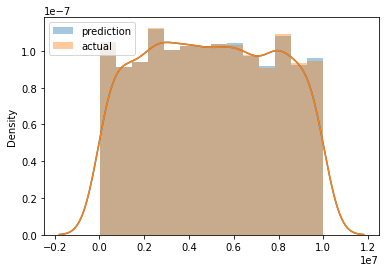

In [219]:
#we get the graphical view of the house we predicted and compare it with the actual house price 
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()